In [126]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [127]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [128]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    # ***************************************************************************************************
    cluster_centers=[]
    for i in range(0,k):
        r=np.random.randint(0,len(data))
        cluster_centers.append(data[r])
    return np.array(cluster_centers)
initialize_clusters(data,3)

array([[  2.133,  67.   ],
       [  4.9  ,  82.   ],
       [  4.833,  80.   ]])

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [129]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: build distance matrix
    # ***************************************************
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.ravel(np.sum(np.square(data - mu[k_th, :]), axis=1))
        
        distance_list.append(sum_squares)
        
    return np.transpose(distance_list)
build_distance_matrix(data,initialize_clusters(data,3)).shape


(272, 3)

#### Update k-means parameters

In [130]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update kmeans parameters
    # ***************************************************
    # Loss
    distance_matrix=build_distance_matrix(data,mu_old)
    # Finding z
    z=np.argmin(distance_matrix,axis=1)
    
    # New mean vector
    mu=[]
    for cluster_n in range(mu_old.shape[0]):
        n=0
        mean=np.zeros(mu_old.shape[1])
        for i in range(len(z)):
            if(z[i]==cluster_n):
                mean+=data[i]
                n+=1
        
        if(n!=0):
            mean=(mean/n)
            mu.append(mean)
        else:
            mu.append(mu_old[cluster_n])
    return distance_matrix,z,np.array(mu)


#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 431.27602931985297.


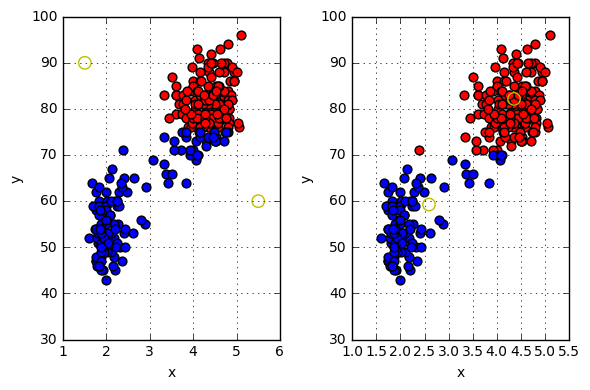

The current iteration of k-means is: 1,                the average loss is 317.40934561229363.


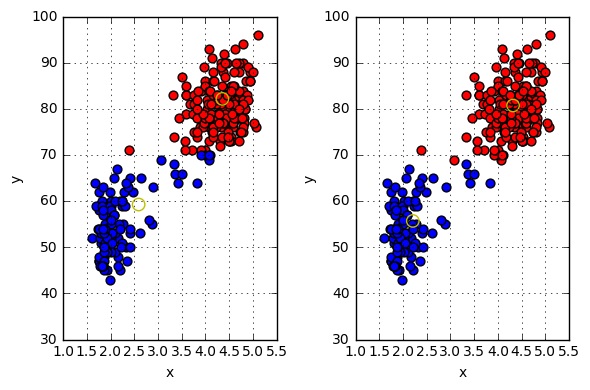

The current iteration of k-means is: 2,                the average loss is 350.4239822988347.


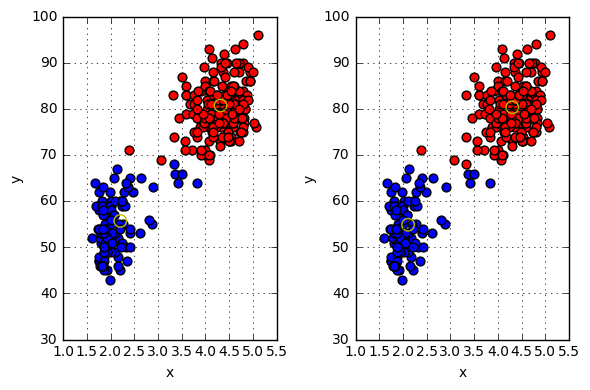

The current iteration of k-means is: 3,                the average loss is 359.7250526904293.


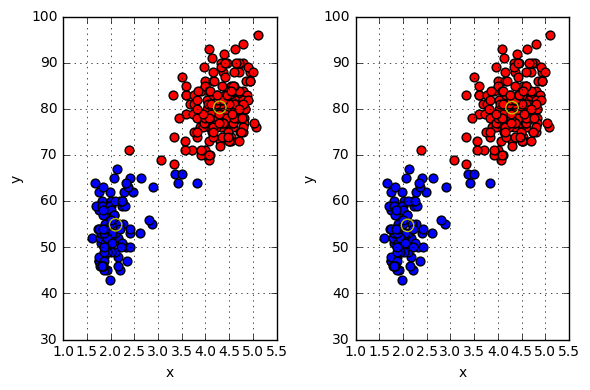

The current iteration of k-means is: 4,                the average loss is 361.17016119901444.


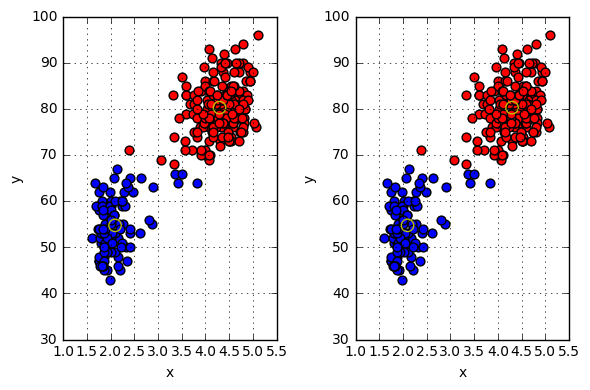

The current iteration of k-means is: 5,                the average loss is 361.17016119901444.


In [131]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    mu_old = np.array([[1.5,90],[5.5,60]])
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [138]:
from helper import load_image

image_path = "getPhoto.jpg"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(2048, 1536, 3), the data type=uint8.


#### preprocess image

In [139]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: vectorize and normalize the original_image.
    # ***************************************************  
    processed_image=[]
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            processed_image.append(original_image[i,j])
  
    return np.array(processed_image)

processed_image = preprocess_image(original_image)
print(processed_image.shape)

(3145728, 3)


The current iteration of k-means is: 0,                the average loss is 299.010125541687.
The current iteration of k-means is: 1,                the average loss is 17604.704860910795.
The current iteration of k-means is: 2,                the average loss is 23101.619894531617.
The current iteration of k-means is: 3,                the average loss is 27155.839272354475.
The current iteration of k-means is: 4,                the average loss is 29352.716480951345.


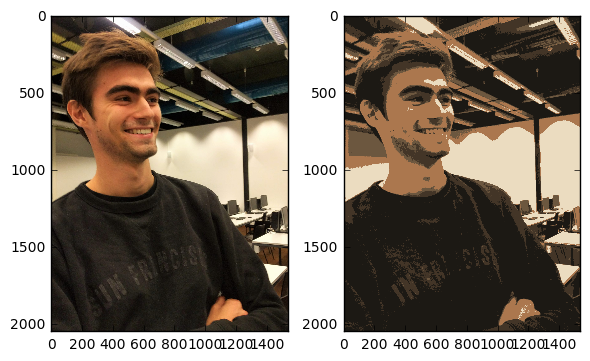

In [141]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold,dev,mean):
    
    mu_old = initialize_clusters(processed_image, k)
    
    
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments,mu = update_kmeans_parameters(processed_image, mu_old)

        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # update k-means information.
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        mu_old = mu
 

    # plot histgram

    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 5
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold,dev,mean)